# Objekteigeschaften isolierter Konvektion in Deutschland

## Konzept

#### Stephan Lenk, 16.06.2020

<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

import seaborn as sns
sns.set_context("talk")

# Ausgangspunkt

- gefilterte HACI-Falldatenbank &rarr; <i>t</i><sub>CI</sub>:= erster Zeitpunkt mit Z&thinsp;&geq;&thinsp;35&thinsp;dBZ
- Zeitraum: 2008 bis 2017 &rarr; ca. 14&thinsp;000 Fälle
- betrachtete Zeit: <i>t</i><sub>CI</sub>&thinsp;&pm;&thinsp;30&thinsp;min
- von Hartwig vorgeschlagene Objektdefinition

# Zielstellung

1. Wie sehen die Eigeschaften einer großen Falldatenbank nicht handselektierter Konvektion in Deutschland aus? 
2. In welchem Zeitfenster ist eine sinnvolle Objektdefinition möglich?
3. Bei welchen und wievielen Fällen ist es möglich aus der Satellitenperspektive sinnvolle Eigenschaften abzuleiten?

# Objektdefinition

- entsprechend Hartwigs Vorschlag: adaptive Objektdefinition ausgehend von lokalen Minima im IR-10,8-&mu;m-Feld (<i>T</i><sub>B, Min.</sub>) mit einer Tiefe&thinsp;&geq;&thinsp;5&thinsp;K

\begin{equation*}
T_\mathrm{B, Schwellwert} = \mathrm{max}\left( T_\mathrm{B, Min.} + 5\,\mathrm{K}; T_\mathrm{B, Min.} + 5\,\mathrm{K} + 15 \frac{T_\mathrm{B, Min.} - 273,15\,\mathrm{K}}{220\,\mathrm{K} - 273,15\,\mathrm{K}}; 240\,\mathrm{K}\right)
\end{equation*}

In [63]:
%%capture out
T_min = np.arange(300,199,-1)

def local_threshold(t_min):
    return np.max((t_min + 5, t_min + 5 + 15 * ((t_min-273.15)/ (220-273.15)), 240))

T_thresh = np.array([local_threshold(T) for T in T_min])

fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(T_min,T_min,color='blue',linestyle='dashed',label=r"$T_\mathrm{Min.}$")
ax.plot(T_min,T_thresh,color='red',linestyle='solid',label=r"$T_\mathrm{Schwellwert}$")
ax.set_xlim(300,200)
ax.legend()
ax.set_xlabel(r"$T_\mathrm{B,Min.}\,/\,\mathrm{K}$")
ax.set_ylabel(r"$T_\mathrm{B,Schwellwert}\,/\,\mathrm{K}$")
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc)
ax.grid(True,alpha=0.7,linestyle='--',linewidth=0.6)
ax.axvline(273.15,color='k',linestyle=':',alpha=0.9,linewidth=1.3)
ax.axvline(220,color='k',linestyle=':',alpha=0.9,linewidth=1.3)
ax.text(295,300,"konst. Abstand",fontsize=14)
ax.text(256,300,"Aufweitung",fontsize=14)
ax.text(219.7,300,"konst. Schwellwert",fontsize=14)
ax.set_title("Adaptive Objektdefinition");

#plt.savefig("/vols/satellite/home/lenk/notebooks/Vorträge/Konzept_Objekteigenschaften/objektdefinition.pdf",bbox_inches="tight")

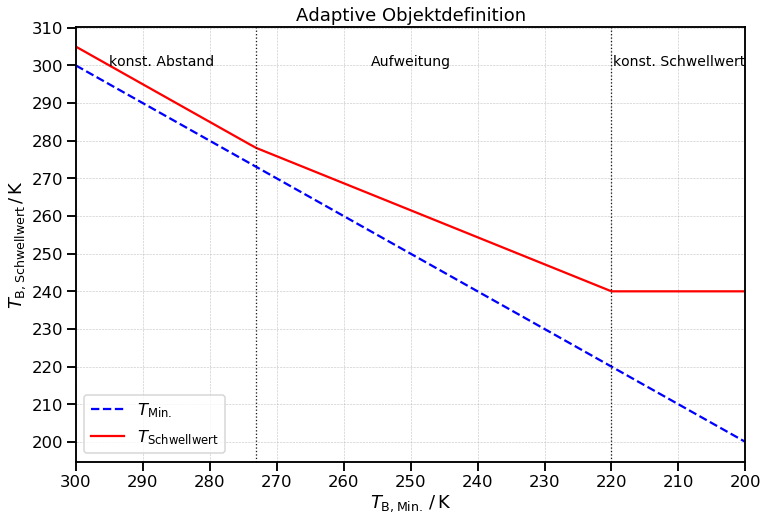

In [65]:
from IPython.display import display
display(out.outputs[1])

# Objekteigenschaften

- SATCAST-Interessenfelder: Ableitung aus 3&thinsp;px&thinsp;&times;&thinsp;3&thinsp;px-Nachbarschaft um das Objektminimum &rarr; Minimum oder Maximum
- Interessenfeldertrends dann aus diesen Objektwerten

| Interessenfeld | Statistikgröße |
| --- | ---|
| <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m) | Minimum
| <i>T</i><sub>B</sub>(6,2&thinsp;&mu;m) &minus; <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m) | Maximum
| <i>T</i><sub>B</sub>(6,2&thinsp;&mu;m) &minus; <i>T</i><sub>B</sub>(7,3&thinsp;&mu;m) | Maximum
| <i>T</i><sub>B</sub>(8,7&thinsp;&mu;m) &minus; <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m) | Maximum
| <i>T</i><sub>B</sub>(6,2&thinsp;&mu;m) &minus; <i>T</i><sub>B</sub>(7,3&thinsp;&mu;m) - Trend | Maximum
| trispektraler Trend | Maximum
| <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m) - Trend | Minimum
| <i>T</i><sub>B</sub>(6,2&thinsp;&mu;m) &minus; <i>T</i><sub>B</sub>(7,3&thinsp;&mu;m) - Trend | Maximum

- eventuell Indikatorgruppen (Wolkenhöhe, Vereisung, Aufwind) zusammenfassen ?
- maximale NWC&thinsp;SAF-Wolkenhöhe, Zeittrend der Wolkenhöhe &rarr; nicht für alle Fälle vorhanden
- Objektfläche, Zeittrend der Objektfläche
- CM&thinsp;SAF - Wolkenmikrophysik? &rarr; nicht für alle Fälle vorhanden

# Falleinteilung

- <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m)-Differenz <i>t</i><sub>CI</sub>&thinsp;&pm;&thinsp;10&thinsp;min &rarr; konvektive Zellen sollten sich abkühlen
- Größenänderung über <i>t</i><sub>CI</sub>&thinsp;&pm;&thinsp;10&thinsp;min oder <i>t</i><sub>CI</sub>&thinsp;&pm;&thinsp;30&thinsp;min &rarr; Fläche sollte bei wachsender Konvektion zunehmen
- Einteilung nach Lebenszyklustypen?: verschiedene Verläufe von <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m) über die Zeit &rarr; logistische Funktionen fitten und Parameter vergleichen?

# Abbildungen

- Objekteigenschaften zu <i>t</i><sub>CI</sub>
- Boxplots Lebenszyklus der SATCAST-Interessenfelder aller Fälle
- Boxplots Lebenszyklus der SATCAST-Interessenfelder aller wirklich wachsenden Fälle
- Boxplot Objektfläche über Zeit / 2D-Histogramm mit Zeit und Verteilung der Objektfläche
- Histogramm <i>T</i><sub>B</sub>(10,8&thinsp;&mu;m)-Differenz <i>t</i><sub>CI</sub>&thinsp;&pm;&thinsp;10&thinsp;min
- Anzahl der erfolgreichen Objektdefinitionen pro Zeitschritt



![interessenfelder](interessenfelder.jpg)

![D_area.jpg](D_ir108.jpg)

![D_area.jpg](D_area.jpg)